<h1><center>JPEG</center></h1>

In this notebook the JPEG is implemened as an assignment to **CIE 425 : Information Theory and Coding** course in **University of Science and Technology, Zewail City, Egypt**. 

### **Prepared By**

#### Name: Mahmoud Yasser    
#### ID:       201700960      
#### Mail:    s-mahmoudyasser@zewailcity.edu.eg

### **Algorithm** 
The general algorithm can be illustrated by this block diagram:
<img src="https://d3i71xaburhd42.cloudfront.net/c1d917dda25be021a0df3c71828ceca01699d8b8/4-Figure3-1.png">
#### For the encoder
1. The image is read and segmented into 8x8 blocks.
<img src="https://www.dspguide.com/graphics/F_27_9.gif">

2. Then for each block, 2D DCT is applied to the block.
   The DCT basis can be obtained by this formula:
<img src="https://i.stack.imgur.com/EpigJ.png">
   the basis can be visualized as follows
   <img src="https://www.dspguide.com/graphics/F_27_10.gif">


3. After that a Quantization Table is applied to the output of 2D DCT. This step is curial to the compression as  dividing (integer division) the 8x8 block by the quantization table is equvelant to assigning less number of bits to this frequency component.  
<img src="https://www.dspguide.com/graphics/F_27_13.gif">

5. Converting 2D to 1D. This step is to make the high frequency components come one after the other as most of them will be zero after the quantization table as a preperation to running length coding. 
<img src="https://www.dspguide.com/graphics/F_27_14.gif">

4. After Converting to 1D it's expected for a natural images to have low values for high frequency components, So the reslut after the integer rounded division will be zero. So we can encode this last zeros of the 1D using running length encoding
<img src="https://www.researchgate.net/publication/331404982/figure/fig3/AS:731274784301057@1551360903174/A-run-length-coding-principle-example.png">

5. The last step is to encode the the resulted sequence by entropy encoding (Huffman). 

#### For the decoder

The reverse sequnce is applied to the recived sequence.

###### An optimized version of the JPEG is implemented after this version by calculating the DCT basis block once and call it when needed in the DCT

## Specifications

It's required to achive a dynamic range of compersion ratio that is between 6:1 and 30:1. 
The JPEG user will have the ability to controll over the needed compression ratio. So there will be 2 basic compressions ratios that are achived by the following quantization table: 
<img src="https://www.dspguide.com/graphics/F_27_13.gif">
The compression ratios can be obtained by multibles these two basic quantization table.

For the image quality, I will use the root mean square and Structural Similarity Index as metrics to evaluate the quality of quantization table . A Structural Similarity Index of 0.2 is required  


### Importing the required Libraries

In [1]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
import imageio
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sympy import Matrix, init_printing ## it's always nice to have the matrix function and init_printing functions
from skimage import color
from skimage import io
from dahuffman import HuffmanCodec

#### Reading the Test Image

In [2]:
# Black and White (gray scale)
 
Img= imageio.imread('test.png',as_gray=True)


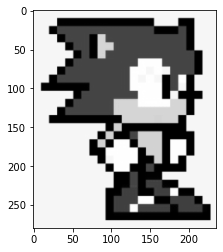

In [3]:
Img=Img-128
plt.imshow(Img, cmap=cm.gray)


### Implementing the 2D DCT and 2D IDCT

In [4]:
def dct2_8(image):
    dct_block=[] #initialize empty list for the basis function 
    
    for u in range(8): # Iterating over horizontal frequencies 
        dct_block.append([]) # adding new row 
        for v in range(8): # Iterating over vertical frequencies 
            dct_block[-1].append([]) # adding new column in the current row
            #This completes the allocation of the cell that will contain a basis function
            
            #Calculating the basis function for that frequency compoment : 
            for x in range(8): # Iterating over the horizontal dimention 
                dct_block[-1][-1].append([]) # adding new row inside the cell 
                for y in range (8):# Iterating over the vertical dimention 
                    #Calculating the basis 
                    dct_block[-1][-1][-1].append(np.cos((2*x+1)*u*np.pi/16)*np.cos((2*y+1)*v*np.pi/16))          
    
    dct_block=np.array(dct_block)# 8*8*8*8 array that represent the bases functions 
    
    result=[]
    for i in range(8):
        result.append([])
        for j in range(8):
            if (i==0 or j == 0):# first row and column to be divided by 32 the rest is by 16
                # Multiplying the image by the corresponding base function 
                result[-1].append(sum(sum(np.array(image)*np.array(dct_block[i,j])))/32) 
            else:
                result[-1].append(sum(sum(np.array(image)*np.array(dct_block[i,j])))/16)

    result[0][0]=result[0][0]/2 # / 2 is for normalization so that the first term to be divied by 64 
    
    return np.array(result)

In [5]:
def idct2_8(image):
    dct_block=[] #initialize empty list for the basis function 
    
    for u in range(8): # Iterating over horizontal frequencies 
        dct_block.append([]) # adding new row 
        for v in range(8): # Iterating over vertical frequencies 
            dct_block[-1].append([]) # adding new column in the current row
            #This completes the allocation of the cell that will contain a basis function
            
            #Calculating the basis function for that frequency compoment : 
            for x in range(8): # Iterating over the horizontal dimention 
                dct_block[-1][-1].append([]) # adding new row inside the cell 
                for y in range (8):# Iterating over the vertical dimention 
                    #Calculating the basis 
                    dct_block[-1][-1][-1].append(np.cos((2*x+1)*u*np.pi/16)*np.cos((2*y+1)*v*np.pi/16))          
    
    dct_block=np.array(dct_block)# 8*8*8*8 array that represent the bases functions 
    result=[]
    for i in range(8):# Multiplying the image by the corresponding base function 
        result.append([])
        for j in range(8):
            result[-1].append(sum(sum(np.array(image)*np.array(dct_block[:,:,i,j]))))
    return np.array(result)

##### Testing both DCT and IDCT

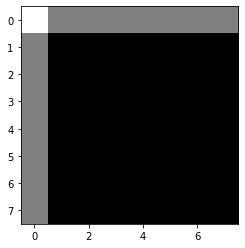

In [6]:
image=Img[0:8,0:8]
plt.imshow(image, cmap=cm.gray)

3.424815986363683e-12

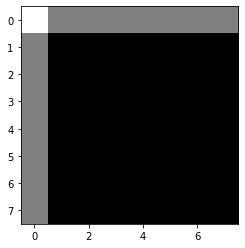

In [7]:
plt.imshow(idct2_8(dct2_8(image)), cmap=cm.gray)
retrived_image=idct2_8(dct2_8(image))
sum(sum(abs(image - retrived_image)))

### Quantization Table
<img src="https://www.dspguide.com/graphics/F_27_13.gif">


In [79]:
def quantization_table(type_,degree=1):
    if type_.upper()=="HIGH" or type_.upper()=="H":
        quantable_high =np.ones((8,8))*256
        for i in range(8):
            for j in range(8):
                if ((i==0 or j ==0) or (i==1 and j ==1)):
                    quantable_high[i,j]=(2**i)*(2**j)
                elif (i+j<=8):
                    quantable_high[i,j]=(2**(i))*(2**(j))/2
                elif (i+j==9):
                    quantable_high[i,j]=(2**(i))*(2**(j))/4
        return quantable_high.astype(int)
    elif type_.upper()=="LOW" or type_.upper()=="L":
        quantable_low =np.ones((8,8))
        quantable_low[4,2:6]=quantable_low[2:6,4]=2
        quantable_low[5:7,0:3]=quantable_low[0:3,5:7]=2
        quantable_low[3,5]=quantable_low[5,3]=2
        quantable_low[0:3,7]=quantable_low[7,0:3]=4
        quantable_low[3:5,6]=quantable_low[6,3:5]=4
        quantable_low[5,5]=4
        quantable_low[3:6,7]=quantable_low[7,3:6]=8
        quantable_low[5:7,6]=quantable_low[6,5:7]=8
        quantable_low[6:8,7]=quantable_low[7,6:8]=16
        return quantable_low.astype(int)
    elif type_.upper()=="VERYHIGH" or type_.upper()=="VH":
        quantable_high =np.ones((8,8))*256
        for i in range(8):
            for j in range(8):
                if ((i==0 or j ==0) or (i==1 and j ==1)):
                    quantable_high[i,j]=(2**i)*(2**j)
                elif (i+j<=8):
                    quantable_high[i,j]=(2**(i))*(2**(j))/2
                elif (i+j==9):
                    quantable_high[i,j]=(2**(i))*(2**(j))/4
        return quantable_high.astype(int)*degree

    elif type_.upper()=="Moderate" or type_.upper()=="M":
        quantable_low =np.ones((8,8))
        quantable_low[4,2:6]=quantable_low[2:6,4]=2
        quantable_low[5:7,0:3]=quantable_low[0:3,5:7]=2
        quantable_low[3,5]=quantable_low[5,3]=2
        quantable_low[0:3,7]=quantable_low[7,0:3]=4
        quantable_low[3:5,6]=quantable_low[6,3:5]=4
        quantable_low[5,5]=4
        quantable_low[3:6,7]=quantable_low[7,3:6]=8
        quantable_low[5:7,6]=quantable_low[6,5:7]=8
        quantable_low[6:8,7]=quantable_low[7,6:8]=16
        return quantable_low.astype(int)*degree


In [80]:
Matrix(quantization_table("l"))

Matrix([
[1, 1, 1, 1, 1, 2,  2,  4],
[1, 1, 1, 1, 1, 2,  2,  4],
[1, 1, 1, 1, 2, 2,  2,  4],
[1, 1, 1, 1, 2, 2,  4,  8],
[1, 1, 2, 2, 2, 2,  4,  8],
[2, 2, 2, 2, 2, 4,  8,  8],
[2, 2, 2, 4, 4, 8,  8, 16],
[4, 4, 4, 8, 8, 8, 16, 16]])

In [81]:
Matrix(quantization_table("h"))

Matrix([
[  1,   2,   4,   8,  16,  32,  64, 128],
[  2,   4,   4,   8,  16,  32,  64, 128],
[  4,   4,   8,  16,  32,  64, 128, 128],
[  8,   8,  16,  32,  64, 128, 128, 256],
[ 16,  16,  32,  64, 128, 128, 256, 256],
[ 32,  32,  64, 128, 128, 256, 256, 256],
[ 64,  64, 128, 128, 256, 256, 256, 256],
[128, 128, 128, 256, 256, 256, 256, 256]])

In [82]:
Matrix(quantization_table("M",2))

Matrix([
[2, 2, 2,  2,  2,  4,  4,  8],
[2, 2, 2,  2,  2,  4,  4,  8],
[2, 2, 2,  2,  4,  4,  4,  8],
[2, 2, 2,  2,  4,  4,  8, 16],
[2, 2, 4,  4,  4,  4,  8, 16],
[4, 4, 4,  4,  4,  8, 16, 16],
[4, 4, 4,  8,  8, 16, 16, 32],
[8, 8, 8, 16, 16, 16, 32, 32]])

In [83]:
Matrix(quantization_table("VH",3))

Matrix([
[  3,   6,  12,  24,  48,  96, 192, 384],
[  6,  12,  12,  24,  48,  96, 192, 384],
[ 12,  12,  24,  48,  96, 192, 384, 384],
[ 24,  24,  48,  96, 192, 384, 384, 768],
[ 48,  48,  96, 192, 384, 384, 768, 768],
[ 96,  96, 192, 384, 384, 768, 768, 768],
[192, 192, 384, 384, 768, 768, 768, 768],
[384, 384, 384, 768, 768, 768, 768, 768]])

### 2D to 1D Transformer


In [57]:
def D2_D1(block):
    one_D= [] 
    for i in range(0,8):
        if i%2 != 0:
            for j in range(0,i+1):
                one_D.append(block[j,i-j])
        else:
            for j in range(0,i+1):
                one_D.append(block[i-j,j])


    for i in range(8,0,-1):
        if i%2 != 0:
            for j in range(1,i):
                one_D.append(block[j+(8-i),i-j+(8-i)])
        else:
            for j in range(1,i):
                one_D.append(block[i-j+(8-i),j+(8-i)])
    return np.array(one_D)
#Matrix(one_D)

##### Testing D2_D1

In [12]:
test_D2_D1=np.zeros((8,8))
s=1
for i in range(0,8):
    for j in range(0,8):
        test_D2_D1[i,j]=s;
        s=s+1
Matrix(test_D2_D1)

Matrix([
[ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0],
[ 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
[17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0],
[25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0],
[33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0],
[41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0],
[49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0],
[57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0]])

In [13]:
D2_D1(test_D2_D1)

array([ 1.,  2.,  9., 17., 10.,  3.,  4., 11., 18., 25., 33., 26., 19.,
       12.,  5.,  6., 13., 20., 27., 34., 41., 49., 42., 35., 28., 21.,
       14.,  7.,  8., 15., 22., 29., 36., 43., 50., 57., 58., 51., 44.,
       37., 30., 23., 16., 24., 31., 38., 45., 52., 59., 60., 53., 46.,
       39., 32., 40., 47., 54., 61., 62., 55., 48., 56., 63., 64.])

Test is correct

### 1D to 2D Transformer


In [14]:
def D1_D2(one_D):
    two_D= np.zeros((8,8))
    counter = 0
    for i in range(0,8):
        if i%2 != 0:
            for j in range(0,i+1):
                two_D[j,i-j]=one_D[counter]
                counter=counter+1
        else:
            for j in range(0,i+1):
                two_D[i-j,j]=one_D[counter]
                counter=counter+1


    for i in range(8,0,-1):
        if i%2 != 0:
            for j in range(1,i):
                two_D[j+(8-i),i-j+(8-i)]=one_D[counter]
                counter=counter+1
        else:
            for j in range(1,i):
                two_D[i-j+(8-i),j+(8-i)]=one_D[counter]
                counter=counter+1
                
    return np.array(two_D)
# Matrix(one_D)

##### Testing D1_D2

In [15]:
Matrix(D1_D2(D2_D1(test_D2_D1)))

Matrix([
[ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0],
[ 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
[17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0],
[25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0],
[33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0],
[41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0],
[49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0],
[57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0]])

Test is correct

### Run Length encoder to the zero streams

In [16]:
def run_encode_zeros(seq):
    out=np.array([])
    i=0
    while True:
        if i>= len(seq):
            return out
        out=np.append(out,seq[i])
        if(seq[i]==0):
            counter=0
            while(seq[i]==0 ):
                counter=counter+1
                i=i+1
                if i>= len(seq):
                    out=np.append(out,counter)
                    return out
            out=np.append(out,counter)
        else:
            i=i+1
    
    return out

##### Testing run_encode_last

In [17]:
run_encode_zeros(np.array([0,0,0,1,2,3,0,0,4,7,8,0,0,0,0,0,0]))

array([0., 3., 1., 2., 3., 0., 2., 4., 7., 8., 0., 6.])

Test is correct

### Run Length Decoder to the zero streams

In [18]:
def run_decode_zeros(seq):
    out=np.array([])
    i=0
    j=0
    while True:
        if j>= len(seq):
            return out
        if seq[j]==0:
            out=np.append(out,np.zeros(int(seq[j+1])))
            i=i+int(seq[j+1])
            j=j+2
        else:
            out=np.append(out,seq[j])
            i=i+1
            j=j+1
    return out


##### Testing run_decode_last

In [19]:
run_decode_zeros(run_encode_zeros(np.array([0,0,0,1,2,3,0,0,4,7,8,0,0,0,0,0,0])))

array([0., 0., 0., 1., 2., 3., 0., 0., 4., 7., 8., 0., 0., 0., 0., 0., 0.])

 Test is correct


### Entropy Encoder and Decoder
In this section I use the dahuffman 0.4.1 python library to encode and decode a list numbers 

Documentation of the library : https://pypi.org/project/dahuffman/

In [20]:
pip install dahuffman # install the library if not yet installed

Note: you may need to restart the kernel to use updated packages.


In [21]:
testimage= dct2_8(image)//quantization_table("h") # appling quantable to get zeros in the end  
testimage

array([[118.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
       [  0.,  -1.,   0.,   0.,   0.,  -1.,  -1.,  -1.],
       [  0.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,   0.],
       [  0.,   0.,  -1.,  -1.,   0.,  -1.,   0.,   0.],
       [  0.,   0.,  -1.,  -1.,   0.,   0.,  -1.,  -1.],
       [  0.,  -1.,  -1.,   0.,   0.,  -1.,  -1.,   0.],
       [  0.,  -1.,  -1.,   0.,   0.,  -1.,   0.,   0.]])

In [22]:
seq=run_encode_zeros(D2_D1(testimage))
seq

array([118.,   0.,   3.,  -1.,   0.,   2.,  -1.,  -1.,   0.,   2.,  -1.,
         0.,   1.,  -1.,   0.,   4.,  -1.,   0.,   4.,  -1.,  -1.,   0.,
         1.,  -1.,   0.,   2.,  -1.,  -1.,   0.,   1.,  -1.,  -1.,  -1.,
         0.,   1.,  -1.,  -1.,  -1.,   0.,   1.,  -1.,  -1.,  -1.,  -1.,
         0.,   1.,  -1.,   0.,   2.,  -1.,   0.,   6.,  -1.,  -1.,   0.,
         1.,  -1.,  -1.,  -1.,   0.,   3.])

In [23]:
from dahuffman import HuffmanCodec #importing https://pypi.org/project/dahuffman/the library
codec = HuffmanCodec.from_data(seq) #generating the Huffman dictionary using the seq
codec.print_code_table()

Bits Code   Value Symbol
   1 0          0 -1.0
   2 10         2 0.0
   5 11000     24 118.0
   6 110010    50 _EOF
   6 110011    51 6.0
   4 1101      13 2.0
   5 11100     28 3.0
   5 11101     29 4.0
   4 1111      15 1.0


In [24]:
table=codec.get_code_table() # geting the coding table from the library
dic={x:np.binary_repr(y[1], width=y[0]) for x,y in zip(table.keys(),table.values())} # constructing encoding dictionary
dic_inverse={np.binary_repr(y[1], width=y[0]):x for y,x in zip(table.values(),table.keys())}# constructing decoding dictionary
dic,dic_inverse

({-1.0: '0',
  0.0: '10',
  118.0: '11000',
  _EOF: '110010',
  6.0: '110011',
  2.0: '1101',
  3.0: '11100',
  4.0: '11101',
  1.0: '1111'},
 {'0': -1.0,
  '10': 0.0,
  '11000': 118.0,
  '110010': _EOF,
  '110011': 6.0,
  '1101': 2.0,
  '11100': 3.0,
  '11101': 4.0,
  '1111': 1.0})

In [25]:
encoded=np.array([dic[x] for x in seq]) # encoding the sequence using the encoding dictionary
encoded 

array(['11000', '10', '11100', '0', '10', '1101', '0', '0', '10', '1101',
       '0', '10', '1111', '0', '10', '11101', '0', '10', '11101', '0',
       '0', '10', '1111', '0', '10', '1101', '0', '0', '10', '1111', '0',
       '0', '0', '10', '1111', '0', '0', '0', '10', '1111', '0', '0', '0',
       '0', '10', '1111', '0', '10', '1101', '0', '10', '110011', '0',
       '0', '10', '1111', '0', '0', '0', '10', '11100'], dtype='<U6')

In [26]:
decoded=D1_D2(run_decode_zeros(np.array([dic_inverse[x] for x in encoded])))
decoded==testimage # comparing the decoded block and the orignial block

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

Test of Entropy encoder and Decoder is successfull for the 8x8 block. (With augmented run length and 1D,2D)

<h1><center>Putting all together</center></h1>


In [85]:
def JPEP_encode(image_location,quantization_type,degree=1):
    Img= imageio.imread(image_location,as_gray=True)#reading the image
    Img=Img-128 # centering the image values to be -128:127
    x,y=Img.shape # finding image dimensions
    quan_table=quantization_table(quantization_type,degree)
    runlength_coded_streams=[] #initialize an empty list for the runlength coded streams  
    for i in range (0,x- x%8,8):
        for j in range (0,y-y%8,8):
            runlength_coded_streams.append(run_encode_zeros(D2_D1(np.around(dct2_8(Img[i:i+8,j:j+8])/quan_table))))    
    
    codec = HuffmanCodec.from_data([item for sublist in runlength_coded_streams for item in sublist ]) #generating the Huffman dictionary using the seq
    table=codec.get_code_table() # geting the coding table from the library
    dic={x:np.binary_repr(y[1], width=y[0]) for x,y in zip(table.keys(),table.values())} # constructing encoding dictionary
    dic_inverse={np.binary_repr(y[1], width=y[0]):x for y,x in zip(table.values(),table.keys())}# constructing decoding dictionary
    encoded_streams=np.array([dic[word] for stream in runlength_coded_streams for word in stream ])
    final_encoded_stream=""
    for symbole in encoded_streams:
        final_encoded_stream = final_encoded_stream+symbole
    
    return final_encoded_stream,dic_inverse,x- x%8,y-y%8

In [86]:
def JPEP_decode(encoded_streams,dic_inverse,x,y,quantization_type,degree=1):
    entropy_decoded=np.array([])
    j=0
    while j<len(encoded_streams):
        code=""
        while(code not in dic_inverse.keys() ):
            code=code+encoded_streams[j]
            j=j+1
        entropy_decoded=np.append(entropy_decoded,dic_inverse[code])
    entropy_decoded=run_decode_zeros(entropy_decoded)
    quan_table=quantization_table(quantization_type,degree)
    decoded_image=np.zeros((x,y))
    k=0
    for i in range(0,x,8):
        for j in range(0,y,8):
            decoded_image[i:i+8,j:j+8]=idct2_8(quan_table*D1_D2(entropy_decoded[k:k+64]))
            k=k+64
    return decoded_image

<h3><left>Working on an example </left></h3>


In [170]:
Img= imageio.imread('test.png',as_gray=True) #original image
encoded_stream_low,dic_inverse_low,x,y=JPEP_encode('test.png',"l")
encoded_stream_moderate,dic_inverse_moderate,x,y=JPEP_encode('test.png',"M",3)
encoded_stream_high,dic_inverse_high,x,y=JPEP_encode('test.png',"H")
encoded_stream_very_high,dic_inverse_very_high,x,y=JPEP_encode('test.png',"VH",4)

In [171]:
print("The Compression ratio for the low quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_low),": 1" )
print("The Compression ratio for the Moderate (degree 3) quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_moderate),": 1" )
print("The Compression ratio for the High quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_high),": 1" )
print("The Compression ratio for the Very High (degree 4) quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_very_high),": 1" )

The Compression ratio for the low quantization table is  6.505270702801567 : 1
The Compression ratio for the Moderate (degree 3) quantization table is  9.19797309103617 : 1
The Compression ratio for the High quantization table is  13.120638085742772 : 1
The Compression ratio for the Very High (degree 4) quantization table is  20.237591788089656 : 1


In [172]:
decoded_low=JPEP_decode(encoded_stream_low,dic_inverse_low,x,y,"l")
decoded_moderate=JPEP_decode(encoded_stream_moderate,dic_inverse_moderate,x,y,"M",degree=3)
decoded_high=JPEP_decode(encoded_stream_high,dic_inverse_high,x,y,"H")
decoded_very_high=JPEP_decode(encoded_stream_very_high,dic_inverse_very_high,x,y,"VH",degree=4)

In [173]:
def rms_(image1,image2):
    x1,y1=image1.shape
    x2,y2=image2.shape
    return np.sqrt(sum(sum((image1[0:min(x1,x2),0:min(y1,y2)]-image2[0:min(x1,x2),0:min(y1,y2)])**2)))

print("The RMS for the low quantization table is ",rms_(Img,decoded_low) )
print("The RMS for the Moderate (degree 3) quantization table is ",rms_(Img,decoded_moderate) )
print("The RMS for the High quantization table is ",rms_(Img,decoded_high) )
print("The RMS for the Very High (degree 4) quantization table is ",rms_(Img,decoded_very_high))

The RMS for the low quantization table is  32634.75542272946
The RMS for the Moderate (degree 3) quantization table is  32736.34775777205
The RMS for the High quantization table is  32717.645150318418
The RMS for the Very High (degree 4) quantization table is  32687.95614523254


Because the image is smooth (have no high frequency content) the RMS is close to each other in each quantization table. That will make 

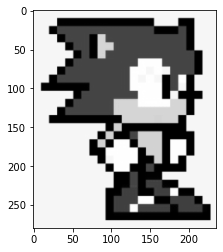

In [174]:
#original image
plt.imshow(Img, cmap=cm.gray)

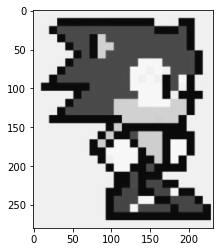

In [175]:
#low compressed image
plt.imshow(decoded_low, cmap=cm.gray)

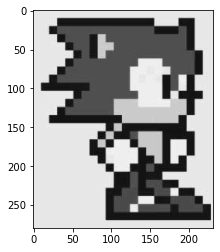

In [176]:
#moderate compressed image
plt.imshow(decoded_moderate, cmap=cm.gray)

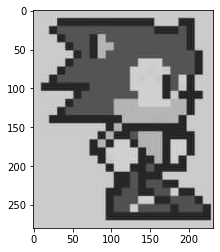

In [177]:
#high compressed image
plt.imshow(decoded_high, cmap=cm.gray)

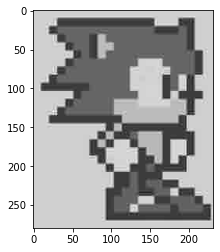

In [178]:
#very high compressed image
plt.imshow(decoded_very_high, cmap=cm.gray)

It's noticed that the decoded image is having less column (and/or potentially rows) than the original image. However, At most 7 rows (and/or columns) is to be croped leaving no noticable effect on the image 

In [128]:
#Testing for high resolution and high frequecny image 
Img= imageio.imread('high_freq.jpeg',as_gray=True) #original image
encoded_stream_low,dic_inverse_low,x,y=JPEP_encode('high_freq.jpeg',"l")
encoded_stream_moderate,dic_inverse_moderate,x,y=JPEP_encode('high_freq.jpeg',"M",3)
encoded_stream_high,dic_inverse_high,x,y=JPEP_encode('high_freq.jpeg',"H")
encoded_stream_very_high,dic_inverse_very_high,x,y=JPEP_encode('high_freq.jpeg',"VH",4)
decoded_low=JPEP_decode(encoded_stream_low,dic_inverse_low,x,y,"l")
decoded_moderate=JPEP_decode(encoded_stream_moderate,dic_inverse_moderate,x,y,"M",degree=3)
decoded_high=JPEP_decode(encoded_stream_high,dic_inverse_high,x,y,"H")
decoded_very_high=JPEP_decode(encoded_stream_very_high,dic_inverse_very_high,x,y,"VH",degree=4)
print("The Compression ratio for the low quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_low),": 1" )
print("The Compression ratio for the Moderate (degree 3) quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_moderate),": 1" )
print("The Compression ratio for the High quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_high),": 1" )
print("The Compression ratio for the Very High (degree 4) quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_very_high),": 1" )
print("The RMS for the low quantization table is ",rms_(Img,decoded_low) )
print("The RMS for the Moderate (degree 3) quantization table is ",rms_(Img,decoded_moderate) )
print("The RMS for the High quantization table is ",rms_(Img,decoded_high) )
print("The RMS for the Very High (degree 4) quantization table is ",rms_(Img,decoded_very_high))

The Compression ratio for the low quantization table is  6.409657407924887 : 1
The Compression ratio for the Moderate (degree 3) quantization table is  10.692414900483907 : 1
The Compression ratio for the High quantization table is  13.957957175791346 : 1
The Compression ratio for the Very High (degree 4) quantization table is  25.080916039040726 : 1
The RMS for the low quantization table is  191779.2226923756
The RMS for the Moderate (degree 3) quantization table is  191761.68038718592
The RMS for the High quantization table is  191873.15798593996
The RMS for the Very High (degree 4) quantization table is  191989.55496763604


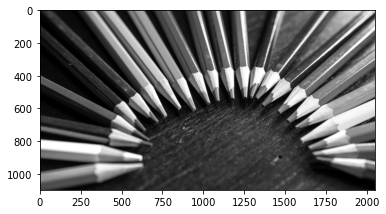

In [130]:
#original image
plt.imshow(Img, cmap=cm.gray)

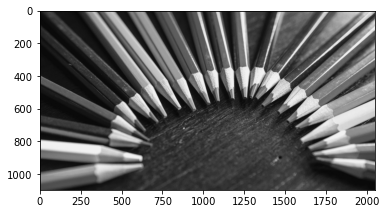

In [131]:
#original image
plt.imshow(decoded_low, cmap=cm.gray)

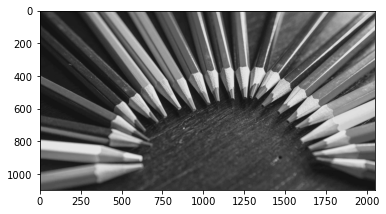

In [132]:
#moderate image
plt.imshow(decoded_moderate, cmap=cm.gray)

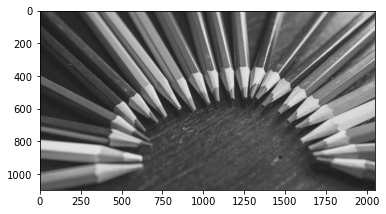

In [133]:
#high image
plt.imshow(decoded_high, cmap=cm.gray)

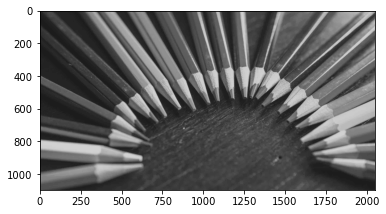

In [134]:
#very original image
plt.imshow(decoded_very_high, cmap=cm.gray)

# Optimized implementation of The Algorithm
the code can be optimized by precalculating the DCT basis block and call it when needed. The not optimized algorithm calculate the DCT basis for each 8x8 block which make it severly inefficent.

In [143]:
def dct_block():
    dct_block=[] #initialize empty list for the basis function 
    
    for u in range(8): # Iterating over horizontal frequencies 
        dct_block.append([]) # adding new row 
        for v in range(8): # Iterating over vertical frequencies 
            dct_block[-1].append([]) # adding new column in the current row
            #This completes the allocation of the cell that will contain a basis function
            
            #Calculating the basis function for that frequency compoment : 
            for x in range(8): # Iterating over the horizontal dimention 
                dct_block[-1][-1].append([]) # adding new row inside the cell 
                for y in range (8):# Iterating over the vertical dimention 
                    #Calculating the basis 
                    dct_block[-1][-1][-1].append(np.cos((2*x+1)*u*np.pi/16)*np.cos((2*y+1)*v*np.pi/16))          
    
    return np.array(dct_block)# 8*8*8*8 array that represent the bases functions 
    

def dct2_8_optimized(image,dct_block):
    
    result=np.zeros((8,8))
    for i in range(8):
        for j in range(8):
            if (i==0 or j == 0):# first row and column to be divided by 32 the rest is by 16
                # Multiplying the image by the corresponding base function 
                result[i,j]=(sum(sum(np.array(image)*np.array(dct_block[i,j])))/32) 
            else:
                result[i,j]=(sum(sum(np.array(image)*np.array(dct_block[i,j])))/16)

    result[0][0]=result[0][0]/2 # / 2 is for normalization so that the first term to be divied by 64 
    
    return np.array(result)
def idct2_8_optimized(image,dct_block):
    result=np.zeros((8,8))
    for i in range(8):# Multiplying the image by the corresponding base function 
        for j in range(8):
            result[i,j]=(sum(sum(np.array(image)*np.array(dct_block[:,:,i,j]))))
    return (result)

In [144]:
def JPEP_encode_optimized(image_location,quantization_type,degree=1):
    dct_block_=dct_block()
    
    Img= imageio.imread(image_location,as_gray=True)#reading the image
    Img=Img-128 # centering the image values to be -128:127
    x,y=Img.shape # finding image dimensions
    quan_table=quantization_table(quantization_type,degree)
    runlength_coded_streams=[] #initialize an empty list for the runlength coded streams  
    for i in range (0,x- x%8,8):
        for j in range (0,y-y%8,8):
            runlength_coded_streams.append(run_encode_zeros(D2_D1(np.around(dct2_8_optimized(Img[i:i+8,j:j+8],dct_block_)/quan_table))))    
    
    codec = HuffmanCodec.from_data([item for sublist in runlength_coded_streams for item in sublist ]) #generating the Huffman dictionary using the seq
    table=codec.get_code_table() # geting the coding table from the library
    dic={x:np.binary_repr(y[1], width=y[0]) for x,y in zip(table.keys(),table.values())} # constructing encoding dictionary
    dic_inverse={np.binary_repr(y[1], width=y[0]):x for y,x in zip(table.values(),table.keys())}# constructing decoding dictionary
    encoded_streams=np.array([dic[word] for stream in runlength_coded_streams for word in stream ])
    final_encoded_stream=""
    for symbole in encoded_streams:
        final_encoded_stream = final_encoded_stream+symbole
    
    return final_encoded_stream,dic_inverse,x- x%8,y-y%8

In [145]:
def JPEP_decode_optimized(encoded_streams,dic_inverse,x,y,quantization_type,degree=1):
    dct_block_=dct_block()
    entropy_decoded=np.array([])
    j=0
    while j<len(encoded_streams):
        code=""
        while(code not in dic_inverse.keys() ):
            code=code+encoded_streams[j]
            j=j+1
        entropy_decoded=np.append(entropy_decoded,dic_inverse[code])
    entropy_decoded=run_decode_zeros(entropy_decoded)
    quan_table=quantization_table(quantization_type,degree)
    
    decoded_image=np.zeros((x,y))
    k=0
    for i in range(0,x,8):
        for j in range(0,y,8):
            decoded_image[i:i+8,j:j+8]=idct2_8_optimized(quan_table*D1_D2(entropy_decoded[k:k+64]),dct_block_)
            k=k+64
    return decoded_image

In [146]:
import timeit

start = timeit.default_timer()

encoded_stream_low,dic_inverse_low,x,y=JPEP_encode('emia.png',"l")

stop = timeit.default_timer()

print('Time of not optimized encoding: ', stop - start)  

Time of not optimized encoding:  79.26895589600099


In [141]:

start = timeit.default_timer()

decoded_low=JPEP_decode(encoded_stream_low,dic_inverse_low,x,y,"l")

stop = timeit.default_timer()

print('Time of not optimized decoding: ', stop - start)  

Time of not optimized decoding:  95.60079716199834


In [147]:

start = timeit.default_timer()

encoded_stream_low,dic_inverse_low,x,y=JPEP_encode_optimized('emia.png',"l")

stop = timeit.default_timer()

print('Time of optimized encoding: ', stop - start)  

Time of optimized encoding:  7.27969544699954


In [148]:

start = timeit.default_timer()

decoded_low=JPEP_decode_optimized(encoded_stream_low,dic_inverse_low,x,y,"l")

stop = timeit.default_timer()

print('Time of optimized decoding: ', stop - start)  

Time of optimized decoding:  18.312016687999858


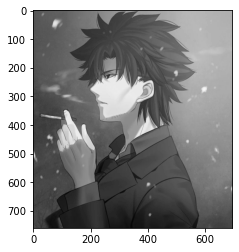

In [149]:
plt.imshow(decoded_low, cmap=cm.gray)

The optimzation works 10 times faster for the encoding and 5 times faster for the decoding
for the decoding to work with the same efficency as the encoder an efficient implementation of the entropy encoder must be obtained (Huffman tree for example).

##### Image Quality 
It looks like the RMS is not a good indicator of the image quality. So, another indicator is used which is Structural Similarity Index (SSIM).

In [156]:
!pip3 install scikit-image opencv-python imutils

In [157]:
#Testing for high resolution and high frequecny image 
Img= imageio.imread('high_freq.jpeg',as_gray=True) #original image
encoded_stream_low,dic_inverse_low,x,y=JPEP_encode_optimized('high_freq.jpeg',"l")
encoded_stream_moderate,dic_inverse_moderate,x,y=JPEP_encode_optimized('high_freq.jpeg',"M",3)
encoded_stream_high,dic_inverse_high,x,y=JPEP_encode_optimized('high_freq.jpeg',"H")
encoded_stream_very_high,dic_inverse_very_high,x,y=JPEP_encode_optimized('high_freq.jpeg',"VH",4)
decoded_low=JPEP_decode_optimized(encoded_stream_low,dic_inverse_low,x,y,"l")
decoded_moderate=JPEP_decode_optimized(encoded_stream_moderate,dic_inverse_moderate,x,y,"M",degree=3)
decoded_high=JPEP_decode_optimized(encoded_stream_high,dic_inverse_high,x,y,"H")
decoded_very_high=JPEP_decode_optimized(encoded_stream_very_high,dic_inverse_very_high,x,y,"VH",degree=4)
print("The Compression ratio for the low quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_low),": 1" )
print("The Compression ratio for the Moderate (degree 3) quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_moderate),": 1" )
print("The Compression ratio for the High quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_high),": 1" )
print("The Compression ratio for the Very High (degree 4) quantization table is ",(Img.shape[0]*Img.shape[1]*8)/len(encoded_stream_very_high),": 1" )

The Compression ratio for the low quantization table is  6.409657407924887 : 1
The Compression ratio for the Moderate (degree 3) quantization table is  10.692414900483907 : 1
The Compression ratio for the High quantization table is  13.957957175791346 : 1
The Compression ratio for the Very High (degree 4) quantization table is  25.080916039040726 : 1


In [168]:
from skimage.metrics import structural_similarity
import argparse
import imutils
import cv2
SSIM=[]

SSIM.append(list( structural_similarity(Img[0:x,0:y], decoded_low, full=True)))
SSIM[-1][1]= (SSIM[-1][1] * 255).astype("uint8")
SSIM.append(list( structural_similarity(Img[0:x,0:y], decoded_moderate, full=True)))
SSIM[-1][1]= (SSIM[-1][1] * 255).astype("uint8")
SSIM.append( list(structural_similarity(Img[0:x,0:y], decoded_high, full=True)))
SSIM[-1][1]= (SSIM[-1][1] * 255).astype("uint8")
SSIM.append(list( structural_similarity(Img[0:x,0:y], decoded_very_high, full=True)))
SSIM[-1][1]= (SSIM[-1][1] * 255).astype("uint8")




print("The SSIM score for the low quantization table is ",SSIM[0][0])
print("The SSIM score for the Moderate (degree 3) quantization table is ",SSIM[1][0] )
print("The SSIM score for the High quantization table is ",SSIM[2][0] )
print("The SSIM score for the Very High (degree 4) quantization table is ",SSIM[3][0] )

<ipython-input-168-b41d1d289585>:7: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  SSIM.append(list( structural_similarity(Img[0:x,0:y], decoded_low, full=True)))
<ipython-input-168-b41d1d289585>:9: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  SSIM.append(list( structural_similarity(Img[0:x,0:y], decoded_moderate, full=True)))
<ipython-input-168-b41d1d289585>:11: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  SSIM.append( list(structural_similarity(Img[0:x,0:y], decoded_high, full=True)))
<ipython-input-168-b41d1d289585>:13: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  SSIM.append(list( structural_similarity(Img[0:x,0:y], decoded_very_high, full=True)))


The SSIM score for the low quantization table is  -0.3285316281645728
The SSIM score for the Moderate (degree 3) quantization table is  -0.27408778736771544
The SSIM score for the High quantization table is  -0.277913717977796
The SSIM score for the Very High (degree 4) quantization table is  -0.1935625987140633


The very highly compressed image do not meet the specifications but the other compressed versions meets it.